# Installing / Importing Libraries

In [211]:
import pandas as pd
import numpy as np
from datetime import datetime, date 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [212]:
matplotlib.rcParams['figure.figsize'] = (10,5)

# Data

In [213]:
path = 'C:/Users/manal/Desktop/Thesis/Manali-CallsPrediction/ml-generic-thesis-project-structure-main/01-raw-data'
df_Inquiries = pd.read_csv(path+'/CallCenter_Inquiries.csv', sep=',', header=0, parse_dates=True)
df_Inquiries

,Unnamed: 0,date,date_time,inquiry_name,brief_description,YEAR,Month,Day_of_Month,Day_of_Year,Quarter,Weekday,time_hour
0,951,2017-01-01T00:00:00.000,2017-01-01T00:00:05.000,Language Assistance,Connect to Language Line.,2017,1,1,1,1,Sunday,0
1,854,2017-01-01T00:00:00.000,2017-01-01T00:01:12.000,Vehicle Blocking Driveway Complaint,Report a vehicle that is blocking a driveway.,2017,1,1,1,1,Sunday,0
2,697,2017-01-01T00:00:00.000,2017-01-01T00:01:41.000,Apartment Maintenance Complaint,Report a maintenance problem inside an apartment.,2017,1,1,1,1,Sunday,0
3,617,2017-01-01T00:00:00.000,2017-01-01T00:02:01.000,Noise from Neighbor,Report a noisy neighbor.,2017,1,1,1,1,Sunday,0
4,720,2017-01-01T00:00:00.000,2017-01-01T00:02:08.000,Find a Police Precinct or PSA by Name,Find a specific precinct or police service are...,2017,1,1,1,1,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29888780,30268221,2022-10-01T00:00:00.000,2022-10-01T01:25:29.000,Elevator or Escalator Complaint,Report a problem with an elevator or escalator.,2022,10,1,274,4,Saturday,1
29888781,30268291,2022-10-01T00:00:00.000,2022-10-01T01:27:32.000,Dirty Sidewalk,"Report a sidewalk or gutter, including 18 inch...",2022,10,1,274,4,Saturday,1
29888782,30268292,2022-10-01T00:00:00.000,2022-10-01T01:27:32.000,Dirty Yard or Alley,"Report an unclean or untidy yard, alley, or co...",2022,10,1,274,4,Saturday,1
29888783,30268243,2022-10-01T00:00:00.000,2022-10-01T01:28:13.000,Animal Abuse,Report abuse or neglect of an animal.,2022,10,1,274,4,Saturday,1


In [214]:
path = 'C:/Users/manal/Desktop/Thesis/Manali-CallsPrediction/ml-generic-thesis-project-structure-main/01-raw-data'
Daily_data = pd.read_csv(path+'/Daily_data.csv', sep=',', header=0, parse_dates=True)
Daily_data

,date,Inquiries_NonStat,Inquiries_Stat
0,2017-01-01,7574.0,NaN
1,2017-01-02,13189.0,NaN
2,2017-01-03,24678.0,NaN
3,2017-01-04,23380.0,1.320733
4,2017-01-05,22809.0,1.247026
...,...,...,...
2095,2022-09-27,11598.0,1.178299
2096,2022-09-28,11886.0,1.298347
2097,2022-09-29,11772.0,NaN
2098,2022-09-30,10669.0,NaN


In [215]:
Daily_data.isna().any()

date                 False
Inquiries_NonStat    False
Inquiries_Stat        True
dtype: bool

In [216]:
Daily_data.describe()

,Inquiries_NonStat,Inquiries_Stat
count,2100.000000,2094.000000
mean,14234.188571,0.998492
std,5816.090211,0.328633
min,96.000000,0.038536
25%,9733.750000,0.599834
50%,13863.500000,1.145044
75%,19307.000000,1.233318
max,30619.000000,2.227288


C:\Users\manal\AppData\Local\Temp\ipykernel_37728\3727895367.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Daily_data.drop(Daily_data.columns.difference(['Inquiries_NonStat']),1, inplace=True)


<AxesSubplot:xlabel='date'>

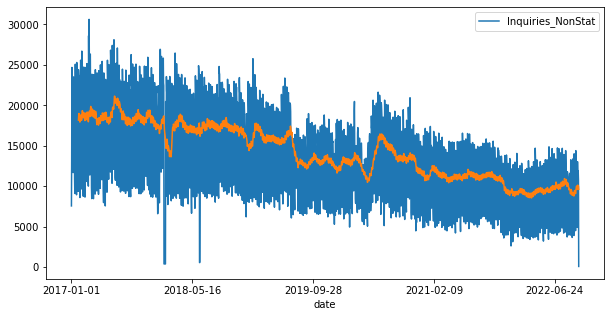

In [217]:
Daily_data.set_index('date', inplace = True)
Daily_data.drop(Daily_data.columns.difference(['Inquiries_NonStat']),1, inplace=True)
Daily_data.plot()
Daily_data.rolling(window=30).mean()['Inquiries_NonStat'].plot()

Average of 30 days

# Splitting the data into 80:20 ratio

In [218]:
train_df = Daily_data.iloc[:1680]
test_df  = Daily_data.iloc[1679:]

In [219]:
train_df.index = pd.to_datetime(train_df.index)
test_df.index = pd.to_datetime(test_df.index)

# Holt-Winters Model with Training Data

In [220]:
# The Holt-Winter's Method: Average, Trend & Seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_model = ExponentialSmoothing(train_df['Inquiries_NonStat'],
                                 trend='mul',
                                 seasonal= 'add',
                                seasonal_periods=7).fit() # try & test

prediction = fit_model.forecast(50) # Predicting 50 days into future
prediction = pd.DataFrame(prediction)
prediction = prediction.rename(columns= {0: 'Predicted_Inquiries'})
prediction.index.name = 'date'
prediction

C:\Users\manal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\manal\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\manal\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Predicted_Inquiries
date,
2021-08-08,5007.575268
2021-08-09,14221.904163
2021-08-10,14183.938245
2021-08-11,13412.132896
2021-08-12,12826.063761
2021-08-13,11612.414632
2021-08-14,5533.508407
2021-08-15,4793.629099
2021-08-16,14008.676563


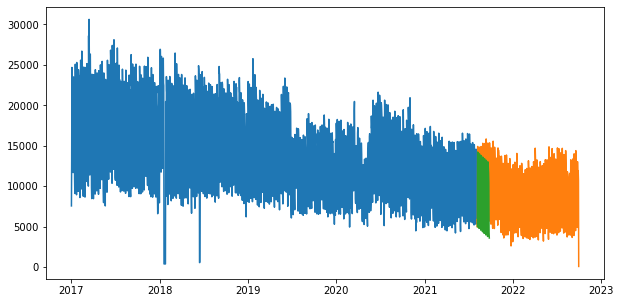

In [221]:
plt.plot(train_df)
plt.plot(test_df)
plt.plot(prediction)
plt.show()

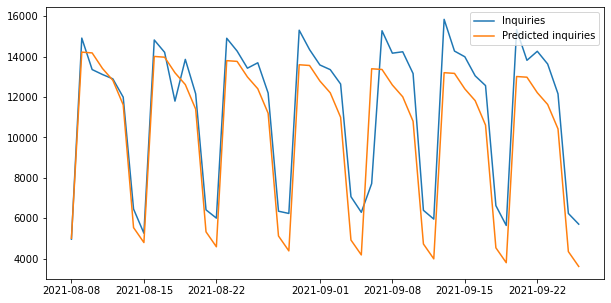

In [222]:
plt.plot(test_df.loc['2021-08-08':'2021-09-26'],label='Inquiries')
plt.plot(prediction.loc['2021-08-08':'2021-09-26'],label='Predicted inquiries')
plt.legend()

# Evaluating Prediction

In [223]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [224]:
mean_absolute_error(test_df.loc['2021-08-08':'2021-09-26'],prediction)

1424.5035878322421

In [225]:
mean_squared_error(test_df.loc['2021-08-08':'2021-09-26'],prediction)

2836299.190743061

In [226]:
np.sqrt(mean_squared_error(test_df.loc['2021-08-08':'2021-09-26'],prediction))

1684.131583559628